In [1]:
# Import Dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import os
import tweepy
import json
from timeit import default_timer as timer

## Data Wrangling

### Gather Data

#### 1. Twitter archive file

In [2]:
# Read csv file 'twitter-archive-enhanced' and saving in a dataframe
twitter_archive = pd.read_csv('Resources/twitter-archive-enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
twitter_archive.shape

(2356, 17)

In [4]:
# Saving all the tweet_id in a list
tweet_list = list(twitter_archive.tweet_id)
len(tweet_list)

2356

#### 2. Tweet image predictions file

In [5]:
# Read image predictins using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
response

<Response [200]>

In [6]:
with open(os.path.join('.','Resources',url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [7]:
image_predictions = pd.read_csv('Resources/image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Twitter API & JSON

#### For security and privacy, API keys have been removed from file

In [8]:
# Get data from twitter API
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
tweet_list1 = tweet_list[0:100]

In [10]:
received_tweets = api.statuses_lookup(tweet_list1, tweet_mode='extended')

In [11]:
with open('Resources/tweet_json.txt', 'w') as outfile:
    for tweet_id in received_tweets:
        json.dump(tweet_id._json, outfile)
        outfile.write('\n')

In [12]:
start = timer()
for i in range(1,24):
    tweet_set = tweet_list[i*100:i*100 + 100]
    received_result = api.statuses_lookup(tweet_set, tweet_mode='extended')
    with open('Resources/tweet_json.txt', 'a') as outfile:
        for tweet_result in received_result:
            json.dump(tweet_result._json, outfile)
            outfile.write('\n')
    print(f'Completed Set {i}')
end = timer()
print('Time: ',end - start)

Completed Set 1
Completed Set 2
Completed Set 3
Completed Set 4
Completed Set 5
Completed Set 6
Completed Set 7
Completed Set 8
Completed Set 9
Completed Set 10
Completed Set 11
Completed Set 12
Completed Set 13
Completed Set 14
Completed Set 15
Completed Set 16
Completed Set 17
Completed Set 18
Completed Set 19
Completed Set 20
Completed Set 21
Completed Set 22
Completed Set 23
Time:  11.629140720000002


In [13]:
with open('Resources/tweet_json.txt') as file:
    twitter_all_data = []
    for line in file:
        twitter_all_data.append(json.loads(line))

In [14]:
api_list = []
for data in twitter_all_data:
    try:
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        tweet_url = data['entities']['media'][0]['url']
    except:
        tweet_url = np.NaN
    try:
        media_url = data['entities']['media'][0]['media_url']
    except:
        tweet_url = np.NaN
    api_list.append({'tweet_id': str(tweet_id),
                         'retweet_count': int(retweet_count),
                         'favorite_count': int(favorite_count),
                         'tweet_url': tweet_url,
                         'media_url': media_url
                        })
twitter_api = pd.DataFrame(api_list)
twitter_api.head()

,tweet_id,retweet_count,favorite_count,tweet_url,media_url
0,876484053909872640,2087,17172,https://t.co/26BXueUgbs,http://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg
1,886366144734445568,2773,19228,https://t.co/RGE08MIJox,http://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg
2,877611172832227328,71,0,https://t.co/dJx4Gzc50G,http://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg
3,888078434458587136,3043,19843,https://t.co/DK7iDPfuRX,http://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg
4,891689557279858688,7552,38320,https://t.co/tD36da7qLQ,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg


### Assess Data

In [15]:
# Table 1
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
df = twitter_archive.loc[((twitter_archive.rating_numerator < 10) | (twitter_archive.rating_numerator > 20)) \
                         & (twitter_archive.in_reply_to_status_id.isna())]
df1 = df[['text', 'rating_numerator']]

In [18]:
df1.head(10)

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
229,This is Jerry. He's doing a distinguished tong...,6
315,When you're so blinded by your systematic plag...,0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
433,The floofs have been released I repeat the flo...,84
462,RT @dog_rates: Meet Herschel. He's slightly bi...,7
485,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,9
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24
599,RT @dog_rates: Here we see a rare pouched pupp...,8
605,RT @dog_rates: Not familiar with this breed. N...,1


In [19]:
# Increasing the column width to read full text
pd.options.display.max_colwidth = 200

In [20]:
df1.head(10)

,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
229,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
462,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7
485,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,9
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
599,RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,8
605,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1


In [22]:
twitter_archive.loc[(twitter_archive.rating_denominator != 10) \
                    & (twitter_archive.in_reply_to_status_id.isna())][['text', 'rating_denominator']]

,text,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80


In [23]:
# Table 2
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
# Table 3
twitter_api.head()

,tweet_id,retweet_count,favorite_count,tweet_url,media_url
0,876484053909872640,2087,17172,https://t.co/26BXueUgbs,http://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg
1,886366144734445568,2773,19228,https://t.co/RGE08MIJox,http://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg
2,877611172832227328,71,0,https://t.co/dJx4Gzc50G,http://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg
3,888078434458587136,3043,19843,https://t.co/DK7iDPfuRX,http://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg
4,891689557279858688,7552,38320,https://t.co/tD36da7qLQ,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg


In [25]:
twitter_api.shape

(2331, 5)

#### Quality Issues
twitter_archive table
* name, doggo, floofer, pupper and puppo columns have value with the name None
* some tweets are retweets (in_reply_to_status_id column not null), need to remove them 
* values in rating_numerator column are incorrect if the given rating is a decimal number 
* date 9/11 is interpreted as rating for 2 tweets (index: 784, 1068)
* store 7/11 is interpreted as rating for tweet index 1662
* tweet index 2335 has incorrect rating
* source column has html tags
* timestamp column is a string. needs to be converted to datetime
* table has extra columns which are not needed for analysis

image_predictions table
* p1, p2, p3 columns have '_' instead of space between words. The needs to be corrected to make it more readable.
* column names are not descriptive

#### Tidiness Issues
* Information about one type of observational unit (tweets) is spread across three different datasets.
* Variable dog_stage is spread across four columns (doggo, floofer, pupper, puppo)

### Clean Data

In [26]:
# Creating a copy of the tables
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_api_clean = twitter_api.copy()

##### Define
Removing all the retweets (tweets where in_reply_to_status_id column is not null)

##### Code

In [27]:
twitter_archive_clean.shape

(2356, 17)

In [28]:
twitter_archive_clean = twitter_archive_clean.loc[twitter_archive_clean.in_reply_to_status_id.isna()]

##### Test

In [29]:
twitter_archive_clean.shape

(2278, 17)

##### Define
Drop extra columns which are not needed for analysis

##### Code

In [30]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',\
                                                    'retweeted_status_id', 'retweeted_status_user_id', \
                                                    'retweeted_status_timestamp'], axis = 1)

##### Test

In [31]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


##### Define
Replace the None in 'doggo', 'floofer', 'pupper', 'puppo' columns with empty string

##### Code

In [32]:
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')

##### Test

In [33]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,,,


##### Define
Tidiness Isuue: Dog stages should be a single column rather than four. Combine the columns into one column

##### Code

In [34]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + \
                                        twitter_archive_clean['floofer'] + \
                                        twitter_archive_clean['pupper'] + \
                                        twitter_archive_clean['puppo']

In [35]:
# Drop unnecessary columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [36]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,


In [38]:
twitter_archive_clean.dog_stage.value_counts()

                1906
pupper           242
doggo             80
puppo             28
doggopupper       11
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [39]:
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('doggopupper', 'multiple')
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('doggopuppo', 'multiple')
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('doggofloofer', 'multiple')

##### Define
Change the datatype of tweet_id column to integer (to merge the different datasets)

In [42]:
twitter_api_clean['tweet_id'].dtype

dtype('O')

##### Code

In [44]:
twitter_api_clean['tweet_id'] = twitter_api_clean['tweet_id'].astype(int)

##### Test

In [45]:
twitter_api_clean['tweet_id'].dtype

dtype('int64')

##### Define
twitter_archive_clean and twitter_api_clean can be merged as they are part of same observational unit

##### Code

In [46]:
tweet_data = pd.merge(twitter_archive_clean, twitter_api_clean, on = 'tweet_id', how = 'inner')

##### Test

In [47]:
tweet_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,tweet_url,media_url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,,7386,35069,https://t.co/MgUWQ76dJU,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,,5499,30363,https://t.co/0Xxu71qeIV,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,,3635,22833,https://t.co/wUnZnhtVJB,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,,7552,38320,https://t.co/tD36da7qLQ,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,,8145,36602,https://t.co/AtUZn91f7f,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg


##### Define
Convert datatype of timestamp column to datetime

##### Code

In [48]:
tweet_data.timestamp = pd.to_datetime(tweet_data.timestamp)

##### Test

In [49]:
tweet_data.timestamp.dtype

datetime64[ns, UTC]

##### Define
Correct the rating_numerator column for rows where the given rating is a decimal number

Correct the rating_numerator column for rows where date 9/11 and store 7/11 is incorrected stored as rating with rating denominator as 11

In [50]:
# Check the numerator values where they have been incorrectly entered
pd.set_option('display.max_colwidth', 500)
tweet_data[tweet_data.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

/Users/Shared/Anaconda/anaconda3/envs/PythonAll/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
43,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
307,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
647,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
713,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1629,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [51]:
tweet_data.query('rating_denominator == 11')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
1007,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1581,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11


##### Code

In [52]:
# Replace the incorrect ratings with correct ratings
tweet_data.loc[1007, 'rating_numerator':'rating_denominator'] = [14, 10]

tweet_data.loc[1581, 'rating_numerator':'rating_denominator'] = [10, 10]

tweet_data.loc[43, 'rating_numerator':'rating_denominator'] = [13.50, 10]

tweet_data.loc[307, 'rating_numerator':'rating_denominator'] = [9.75, 10]

tweet_data.loc[647, 'rating_numerator':'rating_denominator'] = [9.75, 10]

tweet_data.loc[713, 'rating_numerator':'rating_denominator'] = [11.27, 10]

tweet_data.loc[1629, 'rating_numerator':'rating_denominator'] = [11.26, 10]

##### Test

In [53]:
tweet_data.query('rating_denominator == 11')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,tweet_url,media_url


In [54]:
tweet_data[tweet_data.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,tweet_url,media_url
43,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10,Bella,,8655,41695,https://t.co/qjrljjt948,http://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
307,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,,6013,0,NaN,http://pbs.twimg.com/media/C3mOnZ8WMAAQXRY.jpg
647,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,,6013,18021,https://t.co/yBO5wuqaPS,http://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg
713,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,pupper,1564,6434,https://t.co/QFaUiIHxHq,http://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg
1629,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,None,,463,1658,https://t.co/eNm2S6p9BD,http://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg


##### Define
Remove the html tags from the source column

##### Code

In [55]:
# Check the distribution of source values 
tweet_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2119
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [56]:
# Replace the values in the source column with human readable text
tweet_data.source = tweet_data.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
tweet_data.source = tweet_data.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
tweet_data.source = tweet_data.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
tweet_data.source = tweet_data.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

##### Test

In [57]:
tweet_data.source.value_counts()

Twitter for iPhone     2119
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [58]:
# Table 2
image_predictions_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define
Correct the "_" between words in p1, p2, p3 columns. Replace with space to make it more readable.
Rename column names to make them descriptive

##### Code

In [59]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.replace('_', ' ').str.title()
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace('_', ' ').str.title()
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace('_', ' ').str.title()

In [60]:
# Renaming columns to descriptive names
image_predictions_clean = image_predictions_clean.rename(columns = {'jpg_url':'image_url','img_num':'image_number', \
                                                        'p1':'first_prediction',\
                                                        'p2':'second_prediction', \
                                                        'p3':'third_prediction', \
                                                        'p1_conf':'first_prediction_confidence', \
                                                        'p2_conf':'second_prediction_confidence', \
                                                        'p3_conf':'third_prediction_confidence', \
                                                        'p1_dog':'first_prediction_dog', \
                                                        'p2_dog':'second_prediction_dog', \
                                                        'p3_dog':'third_prediction_dog'})

##### Test

In [61]:
image_predictions_clean.head(5)

,tweet_id,image_url,image_number,first_prediction,first_prediction_confidence,first_prediction_dog,second_prediction,second_prediction_confidence,second_prediction_dog,third_prediction,third_prediction_confidence,third_prediction_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define
tweet_data and image_predictions_clean can be merged as they are part of same observational unit (tweet)

In [62]:
# Combing tweet_data df with image_predictions_clean
tweet_data_master = pd.merge(tweet_data, image_predictions_clean, on = 'tweet_id', how = 'inner')
tweet_data_master.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,image_number,first_prediction,first_prediction_confidence,first_prediction_dog,second_prediction,second_prediction_confidence,second_prediction_dog,third_prediction,third_prediction_confidence,third_prediction_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,,7386,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,,5499,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,,3635,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,,7552,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,,8145,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [63]:
tweet_data_master.shape

(2036, 24)

### Storing Data

In [64]:
# Saving data to a CSV file
tweet_data_master.to_csv('twitter_archive_master.csv', index=False)

## Data Analysis

**What does the relationship between retweets and favorites look like?**

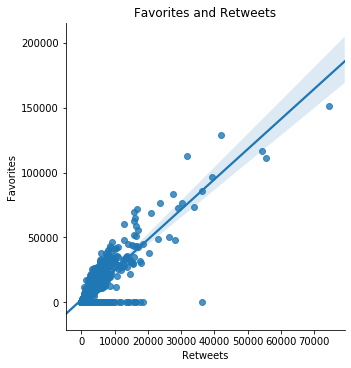

In [98]:
sns.lmplot(x="retweet_count", y="favorite_count", data=tweet_data_master)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.savefig('Saved_Plots/Retweet_Favourite_ScatterPlot.png');

In [80]:
tweet_data_master['retweet_count'].corr(tweet_data_master['favorite_count'])

0.8611278453289016

Positive correlation between retweet_count and favorite_count

**Tweets from WeRateDogs over time**

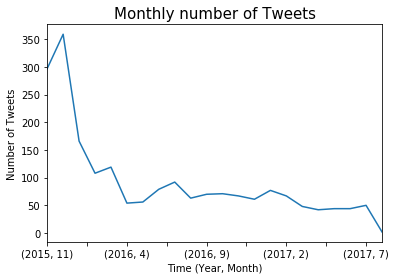

In [84]:
tweets_over_time = tweet_data_master['tweet_id'].groupby([tweet_data_master['timestamp'].dt.year, tweet_data_master['timestamp'].dt.month]).count()
tweets_over_time.plot(kind='line')
plt.title('Monthly number of Tweets', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig('Saved_Plots/Tweet_Trend_over_time.png');

**Source device for the tweets**

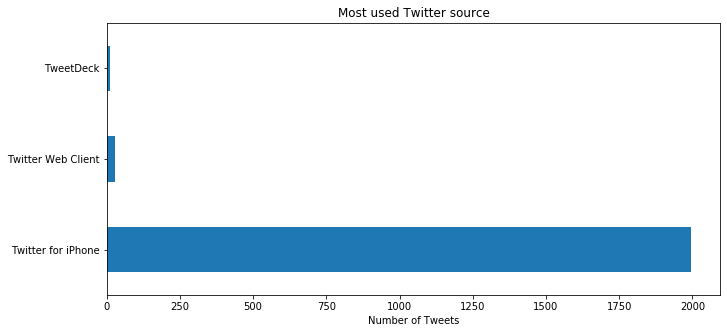

In [85]:
tweet_data_master['source'].value_counts()\
                            .plot(kind='barh', figsize=(11,5), title='Most used Twitter source')\
                            .set_xlabel("Number of Tweets")
plt.savefig('Saved_Plots/Source_Device.png');

**Distribution of Ratings among the Tweets**

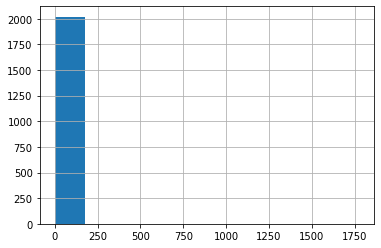

In [87]:
tweet_data_master[tweet_data_master['rating_denominator']==10]['rating_numerator'].hist();

'rating_numerator' column has some outliers

In [88]:
## Removing outliers
tweet_data_master[tweet_data_master['rating_denominator']==10]['rating_numerator'].nlargest(5)

785     1776.0
1759     420.0
220       15.0
9         14.0
21        14.0
Name: rating_numerator, dtype: float64

In [89]:
tweet_data_master_1 = tweet_data_master.drop([785,1759])

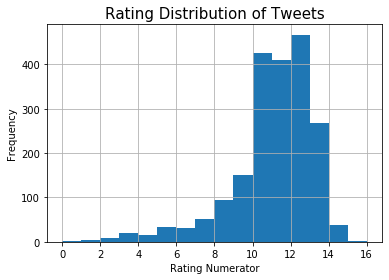

In [99]:
tweet_data_master_1[tweet_data_master_1['rating_denominator']==10]['rating_numerator'].hist(bins=np.arange(17))
plt.title('Rating Distribution of Tweets', size=15)
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.savefig('Saved_Plots/Rating_Histogram.png');

Most common rating given by WeRateDogs is 12 followed by rating 10 and 11

**Analyzing the image prediction for dogs for confidence interval > 0.95**

The code to display the image was reference from the link: https://towardsdatascience.com/rendering-images-inside-a-pandas-dataframe-3631a4883f60

In [92]:
# Filtering the rows where first prediction is a dog with condidence > 90%
conf_90 = tweet_data_master.loc[(tweet_data_master['first_prediction_dog']) & \
                      (tweet_data_master['first_prediction_confidence'] > 0.90)]

In [93]:
# Selecting 10images to display and filtering relevant columns
selected_conf_90 = conf_90[['tweet_id', 'tweet_url', 'media_url', 'first_prediction', 'first_prediction_confidence']].head(10)

In [94]:
# Importing the necessary libraries
from IPython.core.display import HTML

In [95]:
# Converting links to html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="70" >'

In [96]:
# Rendering the images in the dataframe using the HTML method.
HTML(selected_conf_90.to_html(escape=False,formatters=dict(media_url=path_to_image_html)))

,tweet_id,tweet_url,media_url,first_prediction,first_prediction_confidence
10,890006608113172480,https://t.co/dVPW0B0Mme,,Samoyed,0.957979
12,889665388333682689,https://t.co/BxvuXk0UCm,,Pembroke,0.966327
13,889638837579907072,https://t.co/f8dEDcrKSR,,French Bulldog,0.991650
14,889531135344209921,https://t.co/y70o6h3isq,,Golden Retriever,0.953442
19,888078434458587136,https://t.co/DK7iDPfuRX,,French Bulldog,0.995026
28,886366144734445568,https://t.co/RGE08MIJox,,French Bulldog,0.999201
29,886258384151887873,https://t.co/xZDA9Qsq1O,,Pug,0.943575
30,885984800019947520,https://t.co/BuveP0uMF1,,Blenheim Spaniel,0.972494
32,885311592912609280,https://t.co/SATN4If5H5,,Labrador Retriever,0.908703
37,884441805382717440,https://t.co/vvBOcC2VdC,,Pembroke,0.993225


### Observations
* There is a strong positive correlation (0.86) between retweet_count and favorite_count
* The number of tweets made by WeRate Dogs has decreased over the years
* Almost all the tweets made by WeRateDogs are using the phone app
* Most common rating given by WeRateDogs is 12 followed by rating 10 and 11